### MNIST

    MNIST(Mixed National Institute of Standards and Technology) 데이터셋은 손으로 쓴 숫자(0부터 9까지)의 이미지로 구성된 공개 데이터셋입니다. 
    MNIST 데이터셋은 기계 학습과 컴퓨터 비전 분야에서 가장 널리 사용되는 데이터셋 중 하나입니다.

    MNIST 데이터셋은 28x28 크기의 흑백 이미지로 이루어져 있습니다. 각 이미지는 0부터 9까지의 숫자를 나타내며, 이러한 이미지는 레이블(클래스) 정보와 함께 제공됩니다.

    MNIST 데이터셋은 손글씨 숫자를 인식하는 분류 모델을 만들고자 할 때 사용되며, 다양한 기계 학습 알고리즘의 성능을 비교하는 벤치마크로 자주 활용됩니다.

### using PCA and kNN

In [1]:
import pandas as pd

df_train = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')


In [2]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [3]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import numpy as np 
np.sqrt(784)

28.0

In [5]:
X_train = np.array(df_train.iloc[:,1:])
y_train = np.array(df_train['label'])

X_test = np.array(df_test.iloc[:,1:])
y_test = np.array(df_test['label'])

In [6]:
import random

samples = random.choices(population=range(0, 60000), k=16)
samples

[57914,
 44589,
 48327,
 55324,
 43523,
 35173,
 8189,
 34784,
 49127,
 19569,
 59089,
 489,
 2845,
 31471,
 45065,
 3275]

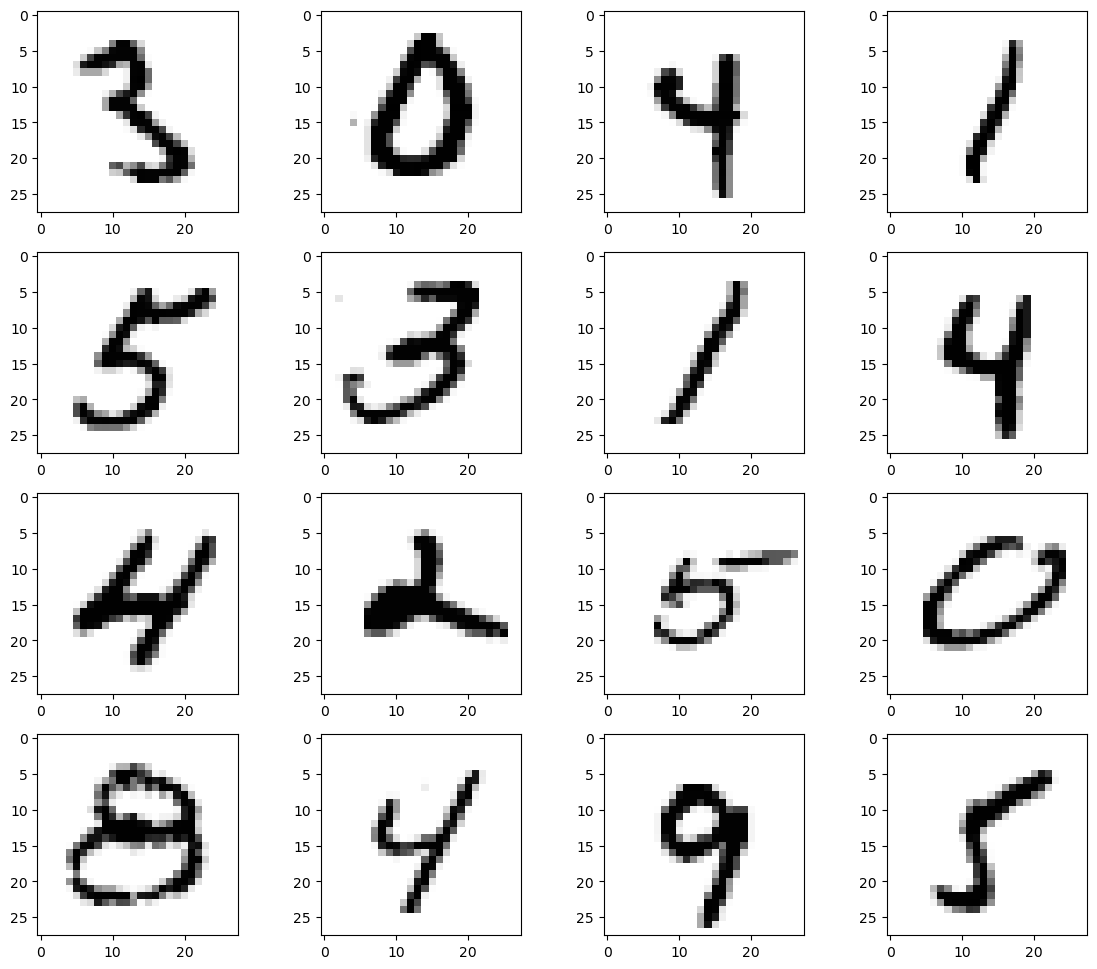

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_train[n].reshape(28,28), cmap='Greys')

plt.show()


In [9]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
from sklearn.metrics import accuracy_score

pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9688

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([
    ('pca', PCA()),
    ('clf', KNeighborsClassifier())
])

param = {
    'pca__n_components' : [2, 5, 10],
    'clf__n_neighbors' : [5, 10, 15]
}

In [21]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
grid = GridSearchCV(pipe, param, cv=kf, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=13, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'clf__n_neighbors': [5, 10, 15],
                         'pca__n_components': [2, 5, 10]},
             verbose=1)

In [22]:
grid.best_score_

0.9310499999999999

In [24]:
grid.best_params_

{'clf__n_neighbors': 10, 'pca__n_components': 10}

In [25]:
pred = grid.best_estimator_.predict(X_test)
accuracy_score(y_test, pred)

0.9289

In [27]:
def results(y_pred, y_test):
    from sklearn.metrics import classification_report, confusion_matrix
    print(classification_report(y_test, y_pred))

results(grid.predict(X_test), y_test)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.99      0.97      1135
           2       0.95      0.95      0.95      1032
           3       0.93      0.91      0.92      1010
           4       0.92      0.90      0.91       982
           5       0.91      0.91      0.91       892
           6       0.95      0.96      0.95       958
           7       0.95      0.92      0.94      1028
           8       0.90      0.88      0.89       974
           9       0.86      0.88      0.87      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



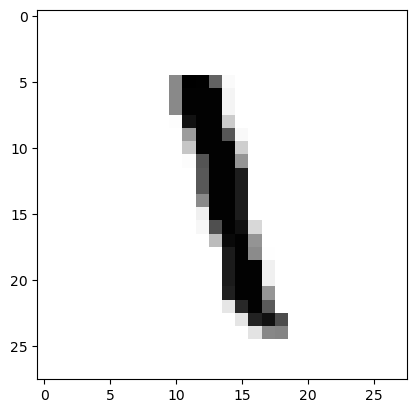

Ans :  [1]
Real :  1


In [28]:
n = 700
plt.imshow(X_test[n].reshape(28, 28), cmap = 'Greys')
plt.show()

print('Ans : ',grid.best_estimator_.predict(X_test[n].reshape(1, 784)))
print('Real : ',y_test[n])

### 틀린 데이터 관찰

In [29]:
preds = grid.best_estimator_.predict(X_test)
pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [30]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [31]:
wrong_results = X_test[y_test!=pred]
samples = random.choices(population=range(0, wrong_results.shape[0]), k =16)

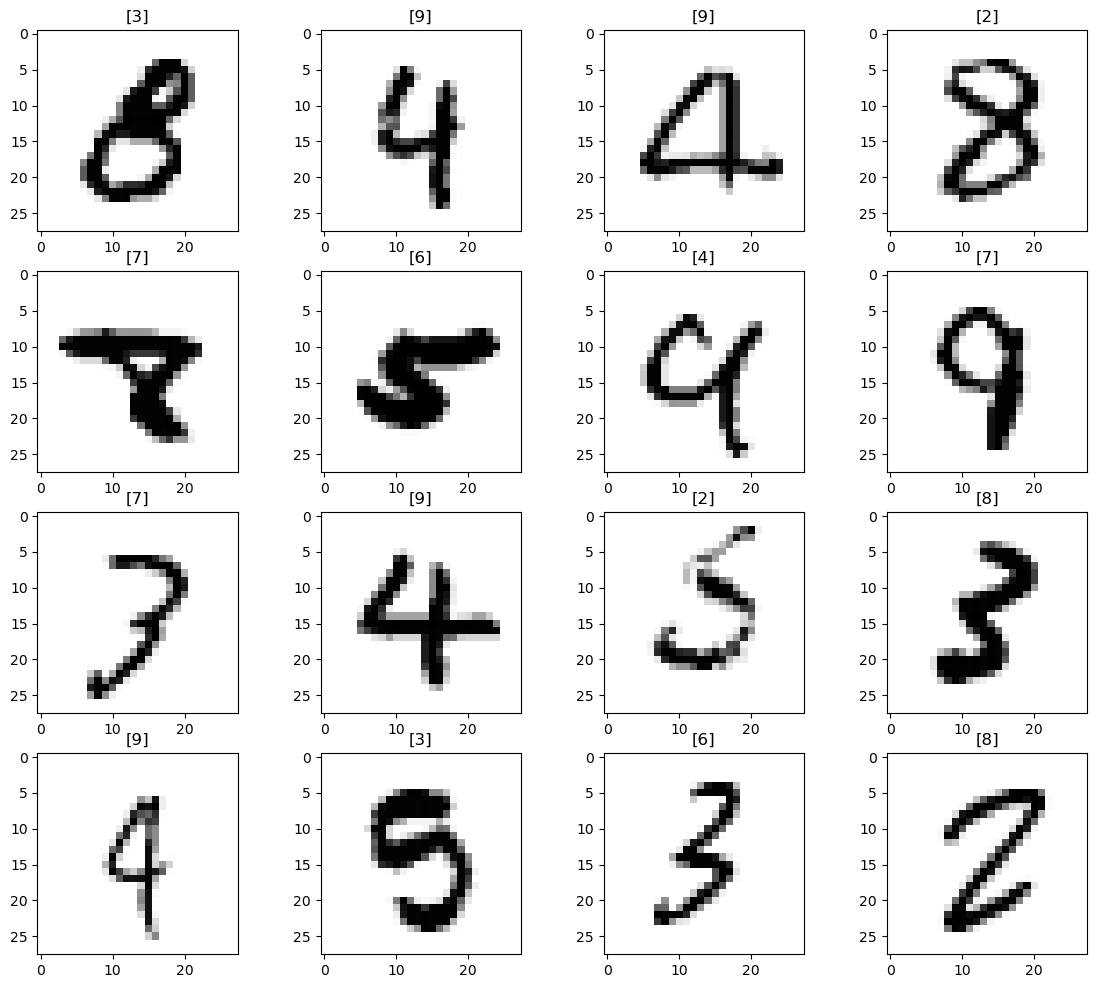

In [32]:
plt.figure(figsize=(14,12))


for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    pred_digit = grid.best_estimator_.predict(wrong_results[n].reshape(1,784))
    plt.imshow(wrong_results[n].reshape(28, 28), cmap = 'Greys')
    plt.title(str(pred_digit))

plt.show()